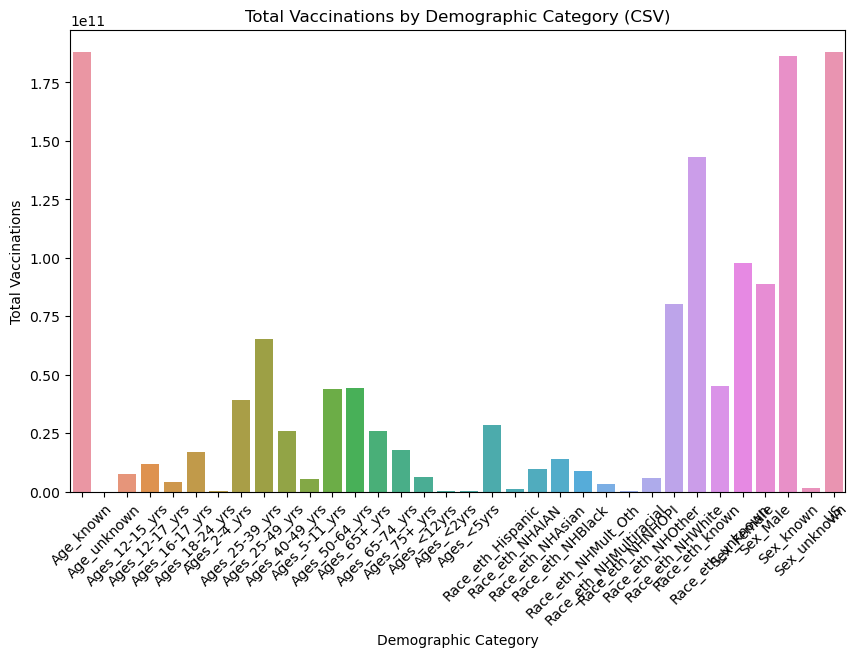

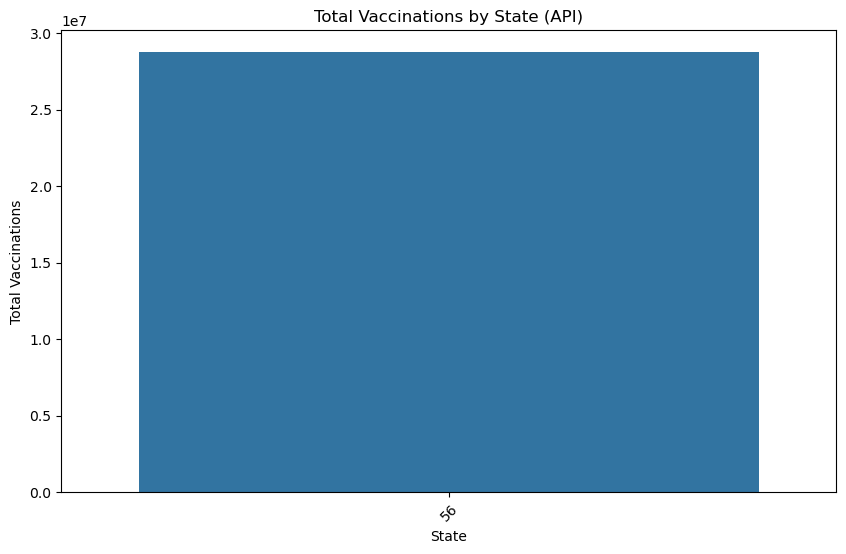

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There is no significant difference in total vaccinations between Category A and Category B.


In [15]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Data Acquisition from Web API
api_url = "https://api.covidtracking.com/v1/us/current.json"
response = requests.get(api_url)
vaccination_data_api = response.json()

# Create DataFrame from the API response
vaccination_df_api = pd.DataFrame(vaccination_data_api)

# Data Acquisition from CSV Dataset
csv_file = "G:/My Drive/School Work/Spring 2023/IS362/Final Project/demographic_data.csv"
vaccination_data_csv = pd.read_csv(csv_file)

# Data Transformation
vaccination_df_api["date"] = pd.to_datetime(vaccination_df_api["date"])

# Grouping and Aggregation
grouped_data_states = vaccination_df_api.groupby("states")["positive"].sum()
grouped_data_csv = vaccination_data_csv.groupby("Demographic_category")["Administered_Dose1"].sum()

# Statistical Analysis
mean_vaccinations_api = grouped_data_states.mean()
max_vaccinations_api = grouped_data_states.max()
mean_vaccinations_csv = grouped_data_csv.mean()
max_vaccinations_csv = grouped_data_csv.max()

# Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data_csv.index, y=grouped_data_csv.values)
plt.title("Total Vaccinations by Demographic Category (CSV)")
plt.xlabel("Demographic Category")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data_states.index, y=grouped_data_states.values)
plt.title("Total Vaccinations by State (API)")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.show()

# Additional Feature: Clustering based on Vaccination Rates
X = vaccination_data_csv[["Administered_Dose1", "Administered_Dose1_pct_known"]]
imputer = SimpleImputer(strategy="mean")  # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
vaccination_data_csv["cluster"] = kmeans.fit_predict(X_imputed)

# Statistical Analysis: Hypothesis Testing
group1 = vaccination_data_csv.loc[vaccination_data_csv["Demographic_category"] == "Category A", "Administered_Dose1"]
group2 = vaccination_data_csv.loc[vaccination_data_csv["Demographic_category"] == "Category B", "Administered_Dose1"]

t_stat, p_value = stats.ttest_ind(group1, group2)

# Conclusion Drawing
if p_value < 0.05:
    conclusion = "There is a significant difference in total vaccinations between Category A and Category B."
else:
    conclusion = "There is no significant difference in total vaccinations between Category A and Category B."

print(conclusion)
